In [1]:
import pandas as pd
import numpy as np
import matplotlib

In [103]:
%matplotlib inline

In [76]:
data = pd.read_csv("Hip_Hop _ Vocab_Chart-Full.csv")

In [17]:
data.head()

,notes,recalc,era,rapper,rapper_clean,color,words,id,source
0,NaN,2988.0,2010s,21 Savage,21 Savage,NaN,2988,21-savage,new
1,NaN,3812.0,2010s,2 Chainz,2 Chainz,NaN,4148,2chainz,poster
2,NaN,3815.0,1990s,2Pac,2Pac,west nowutang second,"3,970",2pac,site
3,NaN,3384.0,2000s,50 Cent,50 Cent,east nowutang first,"3,591",50-cent,site
4,NaN,4534.0,2010s,Ab-Soul,Ab-Soul,NaN,4534,absoul,new


In [18]:
data.dtypes

notes            object
recalc          float64
era              object
rapper           object
rapper_clean     object
color            object
words            object
id               object
source           object
dtype: object

In [77]:
# 'recalc' is 'words' column converted to float, so going to delete 'words' column and rename 'recalc' to 'words'
data.drop(columns=['words'], inplace=True)
data.rename(index=str, columns={"recalc": "words"}, inplace=True)
data.head()

,notes,words,era,rapper,rapper_clean,color,id,source
0,NaN,2988.0,2010s,21 Savage,21 Savage,NaN,21-savage,new
1,NaN,3812.0,2010s,2 Chainz,2 Chainz,NaN,2chainz,poster
2,NaN,3815.0,1990s,2Pac,2Pac,west nowutang second,2pac,site
3,NaN,3384.0,2000s,50 Cent,50 Cent,east nowutang first,50-cent,site
4,NaN,4534.0,2010s,Ab-Soul,Ab-Soul,NaN,absoul,new


In [82]:
data.groupby('era').agg(['count', 'mean', 'max', 'min'])

words                             
      count         mean     max     min
era                                     
1980s     8  4207.500000  4655.0  2778.0
1990s    45  4546.377778  6390.0  2936.0
2000s    50  4633.580000  7879.0  3275.0
2010s    57  3722.807018  5413.0  2472.0

In [79]:
# because 1999s belongs in 1990s and there is only one entry, going to replace 1999s by 1990s
data.replace('1999s', '1990s', inplace = True)

In [83]:
grp_by_era = data.groupby('era').agg(['count', 'mean', 'max', 'min'])
grp_by_era

words                             
      count         mean     max     min
era                                     
1980s     8  4207.500000  4655.0  2778.0
1990s    45  4546.377778  6390.0  2936.0
2000s    50  4633.580000  7879.0  3275.0
2010s    57  3722.807018  5413.0  2472.0

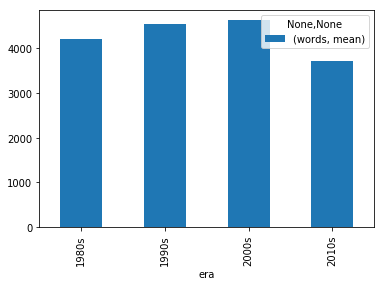

In [104]:
grp_by_era.iloc[:, grp_by_era.columns.get_level_values(1)=='mean'].plot.bar()

In [91]:
max_idx = data[['era','words','rapper_clean']].groupby('era')['words'].idxmax()
min_idx = data[['era','words','rapper_clean']].groupby('era')['words'].idxmin()
max_words = data.loc[max_idx,][['era','words','rapper_clean']]
min_words = data.loc[min_idx,][['era','words','rapper_clean']]

In [85]:
max_words.head()

,era,words,rapper_clean
11,1980s,4655.0,Big Daddy Kane
57,1990s,6390.0,GZA
6,2000s,7879.0,Aesop Rock
154,2010s,5413.0,Watsky


In [86]:
min_words.head()

,era,words,rapper_clean
143,1980s,2778.0,Too Short
41,1990s,2936.0,DMX
72,2000s,3275.0,Juicy J
114,2010s,2472.0,NF
